Loading From Directory

In [1]:
import os
import cv2

In [2]:
base_dir = r'C:\Users\dimas\Documents\Analisis CNN\Coral2'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')

# Directory with our training cat pictures
train_bleached_dir = os.path.join(train_dir, 'bleached_corals')

# Directory with our training dog pictures
train_healthy_dir = os.path.join(train_dir, 'healthy_corals')

# Directory with our validation cat pictures
validation_bleached_dir = os.path.join(validation_dir, 'bleached_corals')

# Directory with our validation dog pictures
validation_healthy_dir = os.path.join(validation_dir, 'healthy_corals')

In [3]:
train_bleached_fnames = os.listdir(train_bleached_dir)
print(train_bleached_fnames[:10])

train_healthy_fnames = os.listdir(train_healthy_dir)
train_healthy_fnames.sort()
print(train_healthy_fnames[:10])

['1.png', '100.png', '10033870215_3664757d59_o.jpg', '101.png', '10160888014_be7c71167c_o.jpg', '102.png', '103.png', '10309615296_7805d8534c_b.jpg', '104.png', '10415679866_6eea4769f6_o.jpg']
['1.png', '101.png', '10160888014_be7c71167c_o.jpg', '10167343533_ea141f7e70_b.jpg', '103.png', '104.png', '10446647406_2e48bd2103_o.jpg', '10472474274_1f73391912_o.jpg', '10472657773_a08f5c73a1_o.jpg', '10479719064_929fa60800_o.jpg']


In [4]:
print('total training bleached images:', len(os.listdir(train_bleached_dir)))
print('total training healthy images:', len(os.listdir(train_healthy_dir)))
print('total validation bleached images:', len(os.listdir(validation_bleached_dir)))
print('total validation healthy images:', len(os.listdir(validation_healthy_dir)))

total training bleached images: 457
total training healthy images: 407
total validation bleached images: 212
total validation healthy images: 189


In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

AttributeError: '_ArtistPropertiesSubstitution' object has no attribute 'register'

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_bleached_pix = [os.path.join(train_bleached_dir, fname) 
                for fname in train_bleached_fnames[pic_index-8:pic_index]]
next_healthy_pix = [os.path.join(train_healthy_dir, fname) 
                for fname in train_healthy_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bleached_pix+next_healthy_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



NameError: name 'plt' is not defined

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

AUGMENTATION DATA

In [9]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

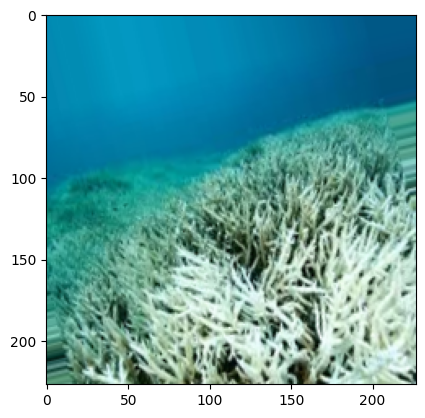

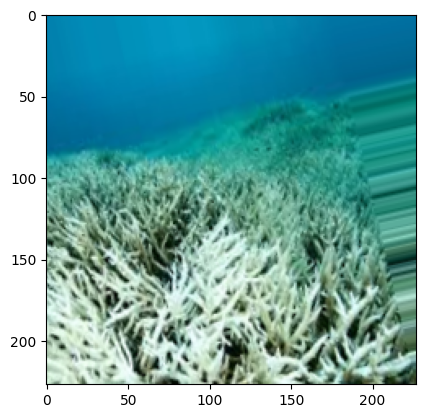

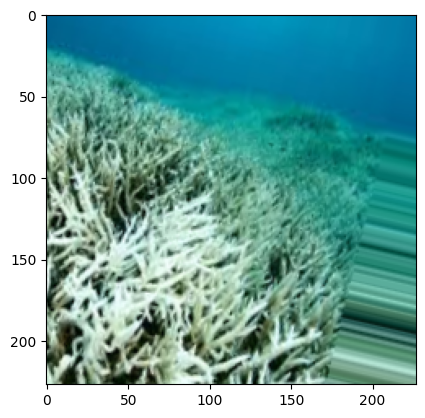

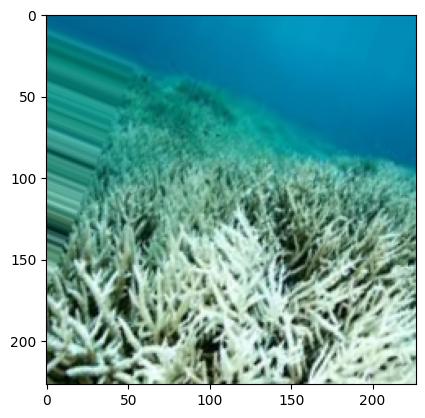

In [10]:
from keras.preprocessing import image

fnames = [os.path.join(train_bleached_dir, fname) for
          fname in os.listdir(train_bleached_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(227, 227))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

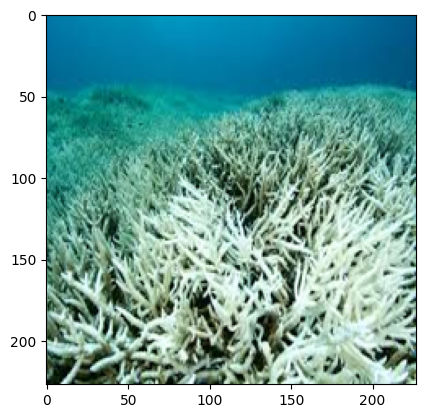

In [11]:
plt.imshow(img)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [13]:
import tensorflow as tf

In [14]:
data = tf.keras.utils.image_dataset_from_directory(base_dir)

Found 1265 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

In [17]:
#Image
batch[0]

array([[[[1.22117188e+02, 8.00625000e+01, 8.96328125e+01],
         [1.39671875e+02, 1.13601562e+02, 1.14992188e+02],
         [1.62875000e+02, 1.60320312e+02, 1.50890625e+02],
         ...,
         [4.18593750e+01, 1.85000000e+02, 2.09000000e+02],
         [4.10000000e+01, 1.85000000e+02, 2.09000000e+02],
         [4.00859375e+01, 1.84085938e+02, 2.08085938e+02]],

        [[1.39046997e+02, 9.35078888e+01, 1.01300827e+02],
         [1.67438553e+02, 1.34795792e+02, 1.33334946e+02],
         [1.98985107e+02, 1.86725189e+02, 1.74252228e+02],
         ...,
         [4.11560974e+01, 1.85000000e+02, 2.09000000e+02],
         [4.03926239e+01, 1.84392624e+02, 2.08392624e+02],
         [4.00156097e+01, 1.84015610e+02, 2.08015610e+02]],

        [[1.53960938e+02, 1.01193283e+02, 1.03830704e+02],
         [1.82960175e+02, 1.38873550e+02, 1.32933945e+02],
         [2.21969421e+02, 1.92313568e+02, 1.73385452e+02],
         ...,
         [3.89082031e+01, 1.84302734e+02, 2.07605469e+02],
         [

In [18]:
#Label
batch[1]

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [19]:
#Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [20]:
#Representation of label
batch[1].shape

(32,)

In [21]:
data = data.map(lambda x,y:(x/255,y))

In [22]:
data.as_numpy_iterator().next()

(array([[[[9.44546536e-02, 5.14062524e-01, 6.47395849e-01],
          [1.01072304e-01, 5.20680130e-01, 6.51991427e-01],
          [1.11488968e-01, 5.31096816e-01, 6.56587005e-01],
          ...,
          [0.00000000e+00, 1.12132356e-02, 1.51348040e-02],
          [1.74632352e-02, 1.94852948e-02, 2.63174027e-02],
          [2.02205894e-03, 2.02205894e-03, 9.86519642e-03]],
 
         [[1.05280019e-01, 5.17871916e-01, 6.44189358e-01],
          [1.11486576e-01, 5.25887311e-01, 6.51991427e-01],
          [1.09981641e-01, 5.31096816e-01, 6.52065039e-01],
          ...,
          [8.02995265e-03, 3.47823799e-02, 3.36886533e-02],
          [2.74622301e-03, 1.35930078e-02, 1.69171505e-02],
          [2.26587635e-02, 3.60876955e-02, 4.04228643e-02]],
 
         [[1.15975291e-01, 5.21275520e-01, 6.43533528e-01],
          [1.19178921e-01, 5.26501238e-01, 6.47925854e-01],
          [1.16268381e-01, 5.29707968e-01, 6.46456242e-01],
          ...,
          [1.82441268e-02, 6.02121390e-02, 5.9915

In [23]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(227, 227, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(96, (11, 11), strides=4, activation='relu')(img_input)
x = layers.MaxPooling2D((3, 3), strides=2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(256, (5, 5), padding = 'same', activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=2)(x)

# Layer 3 - Convolution: 384 filters dengan kernel 3x3, padding 'same'
x = layers.Conv2D(384, (3, 3), padding='same', activation='relu')(x)

# Layer 4 - Convolution: 384 filters dengan kernel 3x3, padding 'same'
x = layers.Conv2D(384, (3, 3), padding='same', activation='relu')(x)

# Layer 5 - Convolution: 256 filters dengan kernel 3x3, padding 'same'
# diikuti dengan MaxPooling (3x3) dengan stride 2
x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = layers.MaxPooling2D((3, 3), strides=2)(x)

In [24]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Fully Connected Layer 1 (Dense): 4096 neurons
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout untuk mencegah overfitting

# Fully Connected Layer 2 (Dense): 4096 neurons
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [25]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 227, 227, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,285,441 (222.34 MB)

 Trainable params: 58,285,441 (222.34 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras.optimizers import Adam

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size= (227, 227),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(227, 227),
        batch_size=128,
        class_mode='binary')

Found 864 images belonging to 2 classes.
Found 401 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (128, 227, 227, 3)
labels batch shape: (128,)


In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
history = model.fit(
      train_generator,
      steps_per_epoch=10,  # 2000 images = batch_size * steps
      epochs=30,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      callbacks=[tensorboard_callback]
      )

Epoch 1/30


c:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 7/10 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - acc: 0.5278 - loss: 0.6919

c:\Users\dimas\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - acc: 0.5386 - loss: 0.6909 - val_acc: 0.6459 - val_loss: 0.6621
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 5s/step - acc: 0.6336 - loss: 0.6470 - val_acc: 0.7706 - val_loss: 0.5163
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - acc: 0.6746 - loss: 0.5931 - val_acc: 0.7481 - val_loss: 0.5181
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step - acc: 0.7460 - loss: 0.5295 - val_acc: 0.7905 - val_loss: 0.4457
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - acc: 0.7446 - loss: 0.5090 - val_acc: 0.8204 - val_loss: 0.4251
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 7s/step - acc: 0.7501 - loss: 0.5125 - val_acc: 0.7756 - val_loss: 0.4387
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - acc: 0.7345 - loss: 0.4955 - val_acc: 0.8304 - val_loss: 0.4331
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - acc: 0.7442 - loss: 0.4908 - val_acc: 0.8204 - val_loss: 0.4181
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 53s 5s/step - acc: 0.7600 - loss: 0.4752 - v

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


C:\Users\dimas\AppData\Local\Temp\ipykernel_14676\156665161.py:43: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\dimas\AppData\Local\Temp\ipykernel_14676\156665161.py:46: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


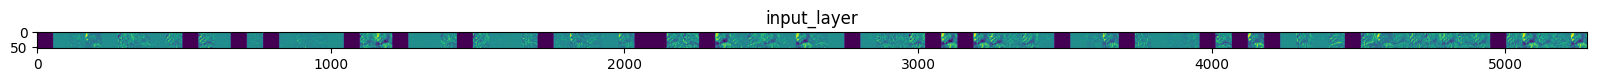

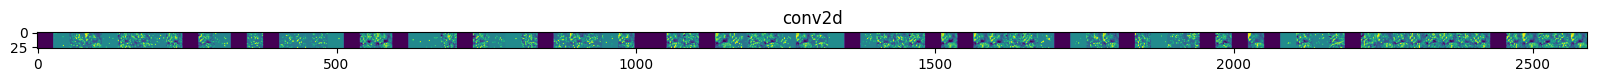

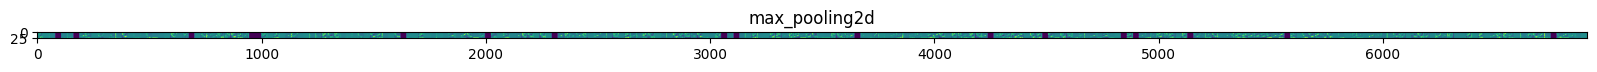

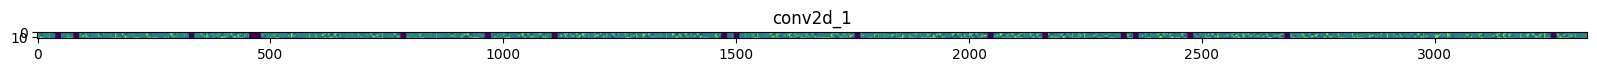

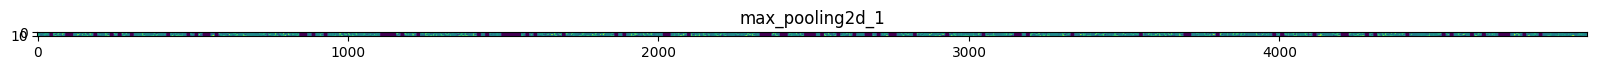

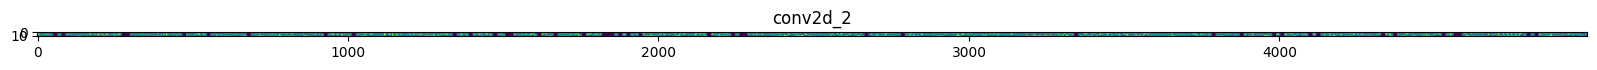

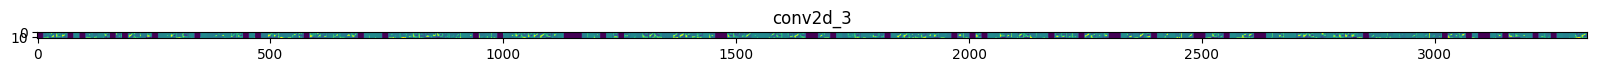

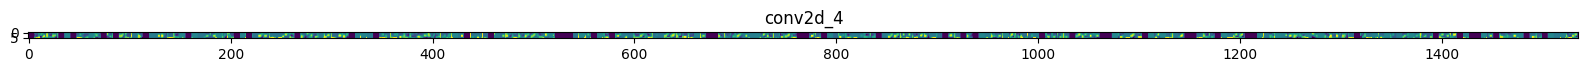

In [32]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

# Let's prepare a random input image of a cat or dog from the training set.
bleached_img_files = [os.path.join(train_bleached_dir, f) for f in train_bleached_fnames]
healthy_img_files = [os.path.join(train_healthy_dir, f) for f in train_healthy_fnames]
img_path = random.choice(bleached_img_files + healthy_img_files)

img = load_img(img_path, target_size=(227, 227))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

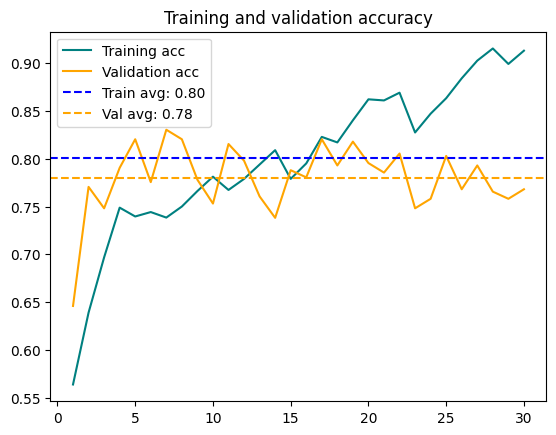

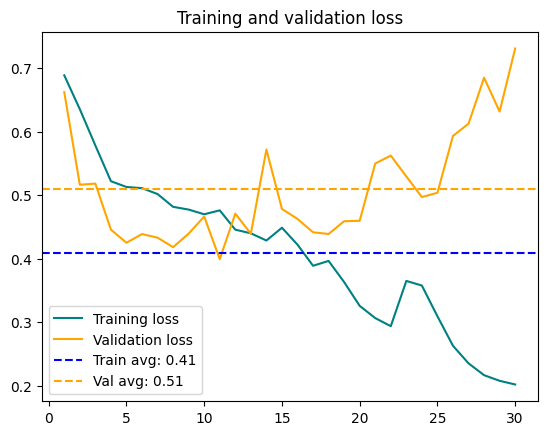

In [33]:
import matplotlib.pyplot as plt
import numpy as np

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
mean_training_acc = np.mean(acc)
mean_validation_acc = np.mean(val_acc)
mean_training_loss = np.mean(loss)
mean_validation_loss = np.mean(val_loss)

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, color='teal', label='Training acc')
plt.plot(epochs, val_acc, color='orange', label='Validation acc')
plt.title('Training and validation accuracy')
plt.axhline(y=mean_training_acc, color='blue', linestyle='--', label=f'Train avg: {mean_training_acc:.2f}')
plt.axhline(y=mean_validation_acc, color='orange', linestyle='--', label=f'Val avg: {mean_validation_acc:.2f}')
plt.legend()
plt.figure()

plt.plot(epochs, loss, color='teal', label='Training loss')
plt.plot(epochs, val_loss, color='orange', label='Validation loss')
plt.title('Training and validation loss')
plt.axhline(y=mean_training_loss, color='blue', linestyle='--', label=f'Train avg: {mean_training_loss:.2f}')
plt.axhline(y=mean_validation_loss, color='orange', linestyle='--', label=f'Val avg: {mean_validation_loss:.2f}')
plt.legend()
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
validation_generator.reset()
y_pred = (model.predict(validation_generator)>0.5).astype("int32")
y_true = validation_generator.classes
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
sensitivity = tp / (tp + fn)
print("sensitivity (recall):", sensitivity)
specificity = tn / (tn + fp)
print("specificity :", specificity)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
sensitivity (recall): 0.4497354497354497
specificity : 0.5801886792452831


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import tkinter as tk
from tkinter import ttk, filedialog
from tkinter import Label, Button
from PIL import Image, ImageTk
import cv2

In [37]:
def calculate_damage_percentage(base_dir):
    image = cv2.imread(base_dir)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(image, (150, 150))
    # Threshold warna untuk mendeteksi kerusakan (misalnya, area putih/cerah)
    lower_bound = np.array([180, 180, 180])  # Nilai putih terang
    upper_bound = np.array([255, 255, 255])

    mask = cv2.inRange(resized, lower_bound, upper_bound)
    damage_area = np.sum(mask > 0)
    total_area = resized.shape[0] * resized.shape[1]

    damage_percentage = (damage_area / total_area) * 100
    return damage_percentage

In [38]:
# Fungsi Prediksi
def predict_image(file_path):
    img = load_img(file_path, target_size=(227, 227))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    class_names = ['Healthy', 'Bleaching']
    damage_percentage = calculate_damage_percentage(file_path)
    return (
        class_names[np.argmax(predictions)], 
        predictions[0][np.argmax(predictions)],
        damage_percentage
    )

In [39]:
def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    if file_path:
        # Menampilkan gambar
        img = Image.open(file_path)
        img = img.resize((400, 300))
        img_tk = ImageTk.PhotoImage(img)
        img_label.configure(image=img_tk)
        img_label.image = img_tk

        # Melakukan prediksi
        result, confidence, damage = predict_image(file_path)
        result_label.config(
            text=f"Prediction: {result} ({confidence * 100:.2f}%)\nDamage: {damage:.2f}%",
            font=("Arial", 14, "bold"),
            foreground="green" if result == "Healthy" else "red"
        )

In [ ]:
# Setup GUI
root = tk.Tk()
root.title("Coral Classification with Damage Estimation")
root.maxsize(900, 600)
# Memuat gambar latar belakang
bg_image = Image.open("rektorat.jpg")  # Ganti "background.jpg" dengan path ke gambar Anda
bg_image = bg_image.resize((900, 600))  # Menyesuaikan ukuran gambar ke jendela
bg_photo = ImageTk.PhotoImage(bg_image)

# Label untuk latar belakang
bg_label = Label(root, image=bg_photo)
bg_label.image = bg_photo
bg_label.place(relwidth=1, relheight=1)

# Label untuk gambar
img_label = Label(root, bg="black")
img_label.pack( )

# Tombol untuk memilih file
select_button = Button(root, text="Select Image", bg='white', fg='black', command=open_file)
select_button.place(relx=0.44, rely=0.79, relwidth=0.15, relheight=0.05)

# Label untuk hasil
result_label = Label(root, text="Prediction: None\nDamage: N/A", font=("Arial", 15))
result_label.place(relx=0.36, rely=0.85, relwidth=0.3, relheight=0.1)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━